## PROJECT TITLE

Air Quality & Climate Health Risk Prediction using Machine Learning

## PROBLEM STATEMENT

Air pollution has become a critical climate-related risk, especially in rapidly urbanizing regions of India. Poor air quality leads to respiratory and cardiovascular diseases and, during extreme pollution events (smog, wildfires, stagnant heat), it can escalate into a public health disaster.

## PROJECT STATEMENT

This project uses the Air Quality Data in India (2015–2020) dataset from Kaggle to design a machine learning–based early warning system. It aims to predict air pollution peaks and assess climate-related health risks.

In [22]:
# IMPORTINGG NECESSARY LIBRARIES[WEEK 1]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# LOADING THE DATASET
df = pd.read_csv('city_day.csv')

# DISPLAYING FIRST 10 ROWS
print(df.head(10))

        City        Date  PM2.5  PM10      NO    NO2     NOx  NH3      CO  \
0  Ahmedabad  2015-01-01    NaN   NaN    0.92  18.22   17.15  NaN    0.92   
1  Ahmedabad  2015-01-02    NaN   NaN    0.97  15.69   16.46  NaN    0.97   
2  Ahmedabad  2015-01-03    NaN   NaN   17.40  19.30   29.70  NaN   17.40   
3  Ahmedabad  2015-01-04    NaN   NaN    1.70  18.48   17.97  NaN    1.70   
4  Ahmedabad  2015-01-05    NaN   NaN   22.10  21.42   37.76  NaN   22.10   
5  Ahmedabad  2015-01-06    NaN   NaN   45.41  38.48   81.50  NaN   45.41   
6  Ahmedabad  2015-01-07    NaN   NaN  112.16  40.62  130.77  NaN  112.16   
7  Ahmedabad  2015-01-08    NaN   NaN   80.87  36.74   96.75  NaN   80.87   
8  Ahmedabad  2015-01-09    NaN   NaN   29.16  31.00   48.00  NaN   29.16   
9  Ahmedabad  2015-01-10    NaN   NaN     NaN   7.04    0.00  NaN     NaN   

     SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  27.64  133.36     0.00     0.02    0.00  NaN        NaN  
1  24.55   34.06     3.68     

In [24]:
# BASIC INFORMATION
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
              PM2.5          PM10            NO           NO2           NOx  \
count  24933.000

In [25]:
print(df.shape)
print(df.info())

(29531, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


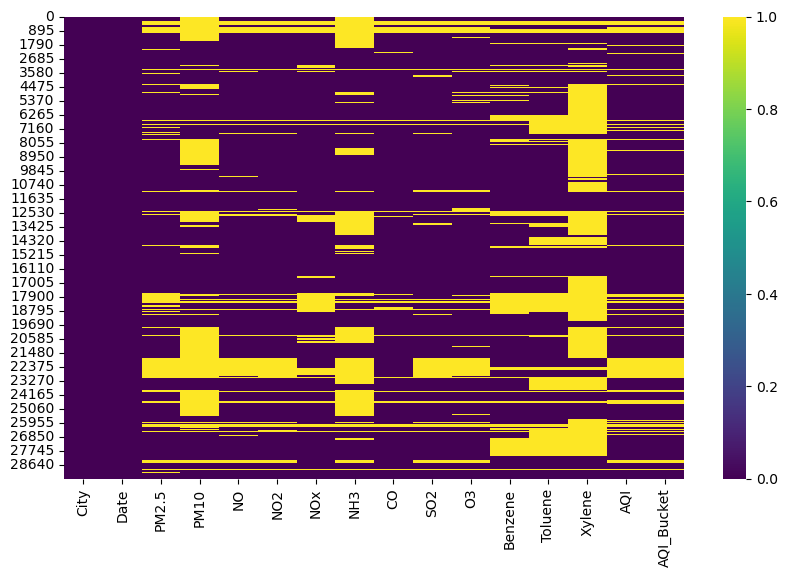

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=True, cmap="viridis")
plt.show()

In [27]:
print(df["Xylene"].isnull().sum()) # Out of (29531) rows "Xylene" had (18109) NaN values, hence won't gonna use it

18109


In [28]:
df_modified = df.drop('Xylene', axis=1)
print(df_modified.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
dtypes: float64(12), object(3)
memory usage: 3.4+ MB
None


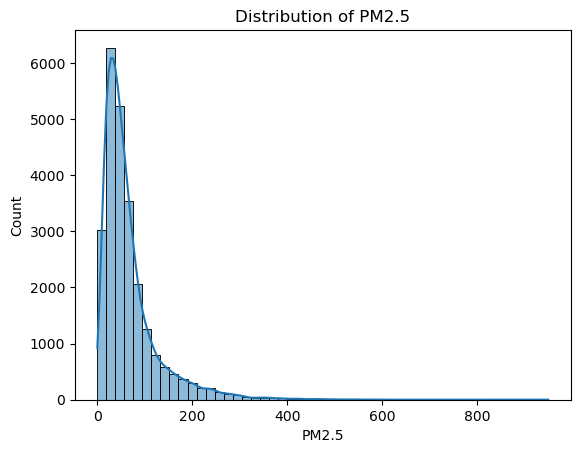

In [29]:
sns.histplot(df["PM2.5"].dropna(), bins=50, kde=True)
plt.title("Distribution of PM2.5")
plt.show()

In [30]:
print(df["PM2.5"])

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
29526    15.02
29527    24.38
29528    22.91
29529    16.64
29530    15.00
Name: PM2.5, Length: 29531, dtype: float64


In [31]:
print(df["PM2.5"].mean())
print(df["PM2.5"].median())

67.45057794890306
48.57


In [32]:
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
Date           0.000000
City           0.000000
dtype: float64


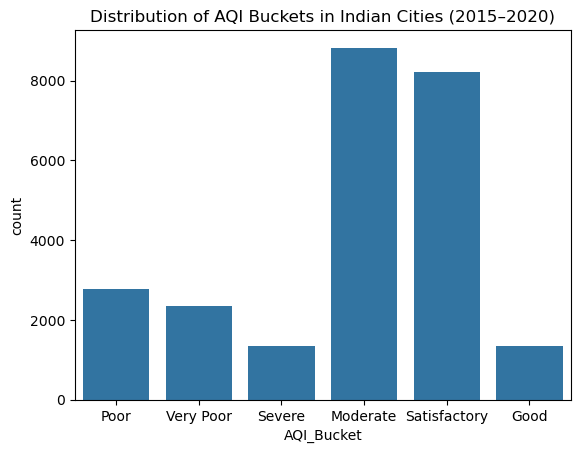

In [33]:
# Univariate Analysis
sns.countplot(x="AQI_Bucket", data=df)
plt.title('Distribution of AQI Buckets in Indian Cities (2015–2020)')
plt.show()

In [34]:
#cols Name
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

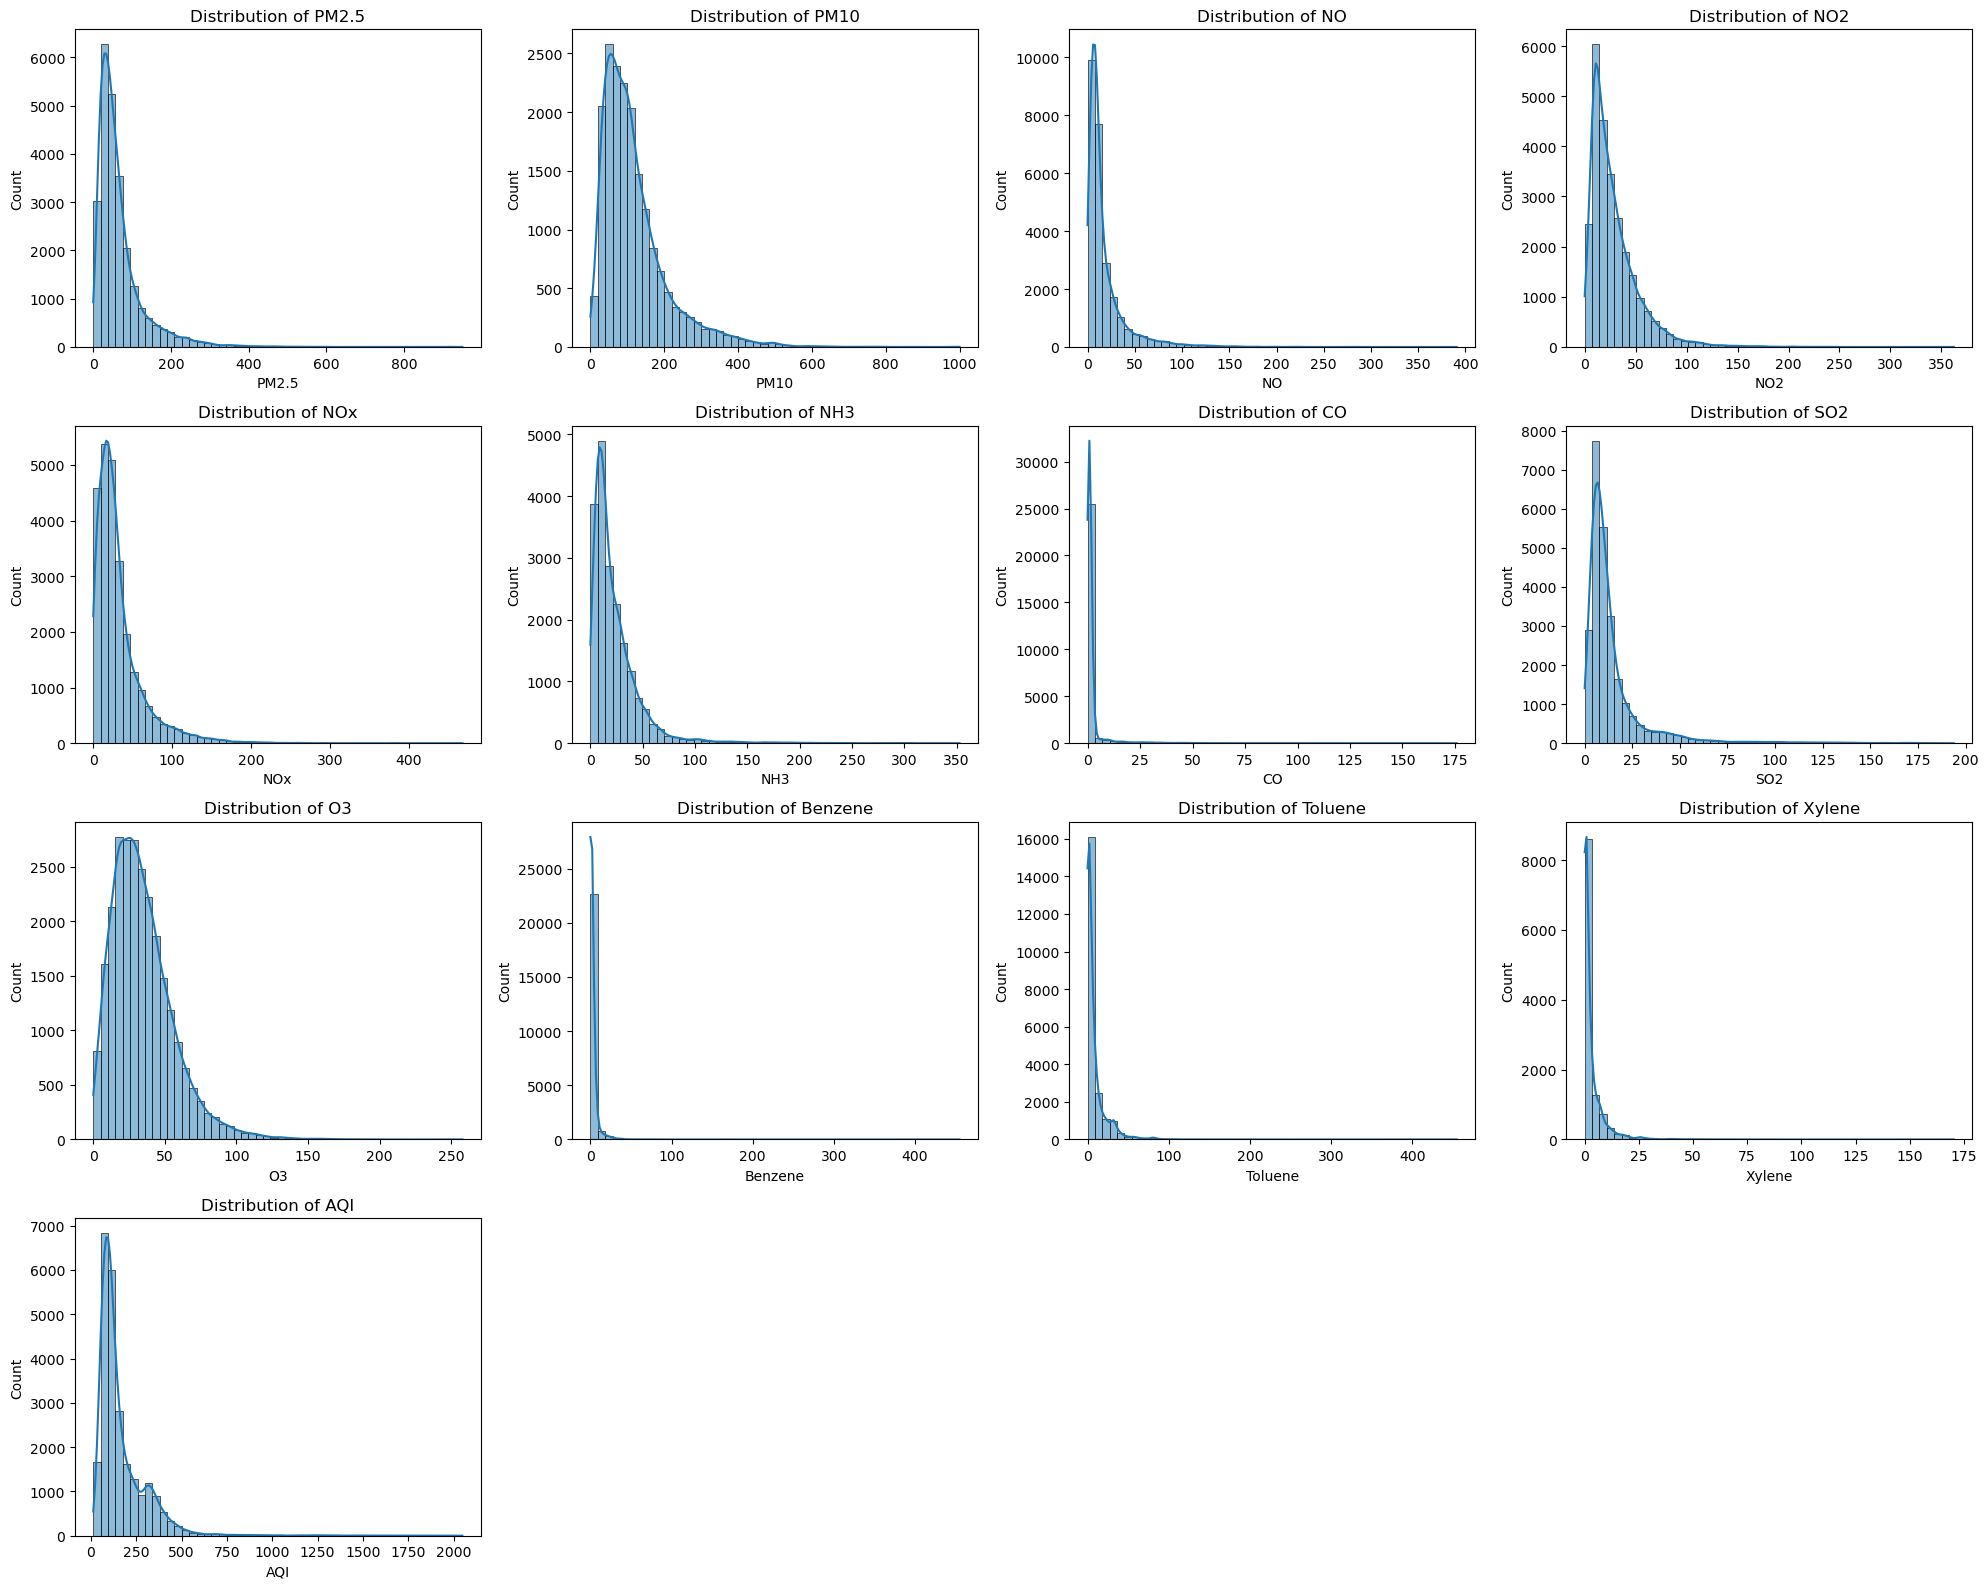

In [35]:
# Numeric Columns
num_cols=('PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI')

# Creating subplot grid (4 rows × 4 columns for 16 slots)
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()  # flatten grid into 1D for iteration Loop over numeric columns

for ax, col in zip(axes, num_cols):
    sns.histplot(df[col].dropna(), bins=50, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

# Remove unused subplots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

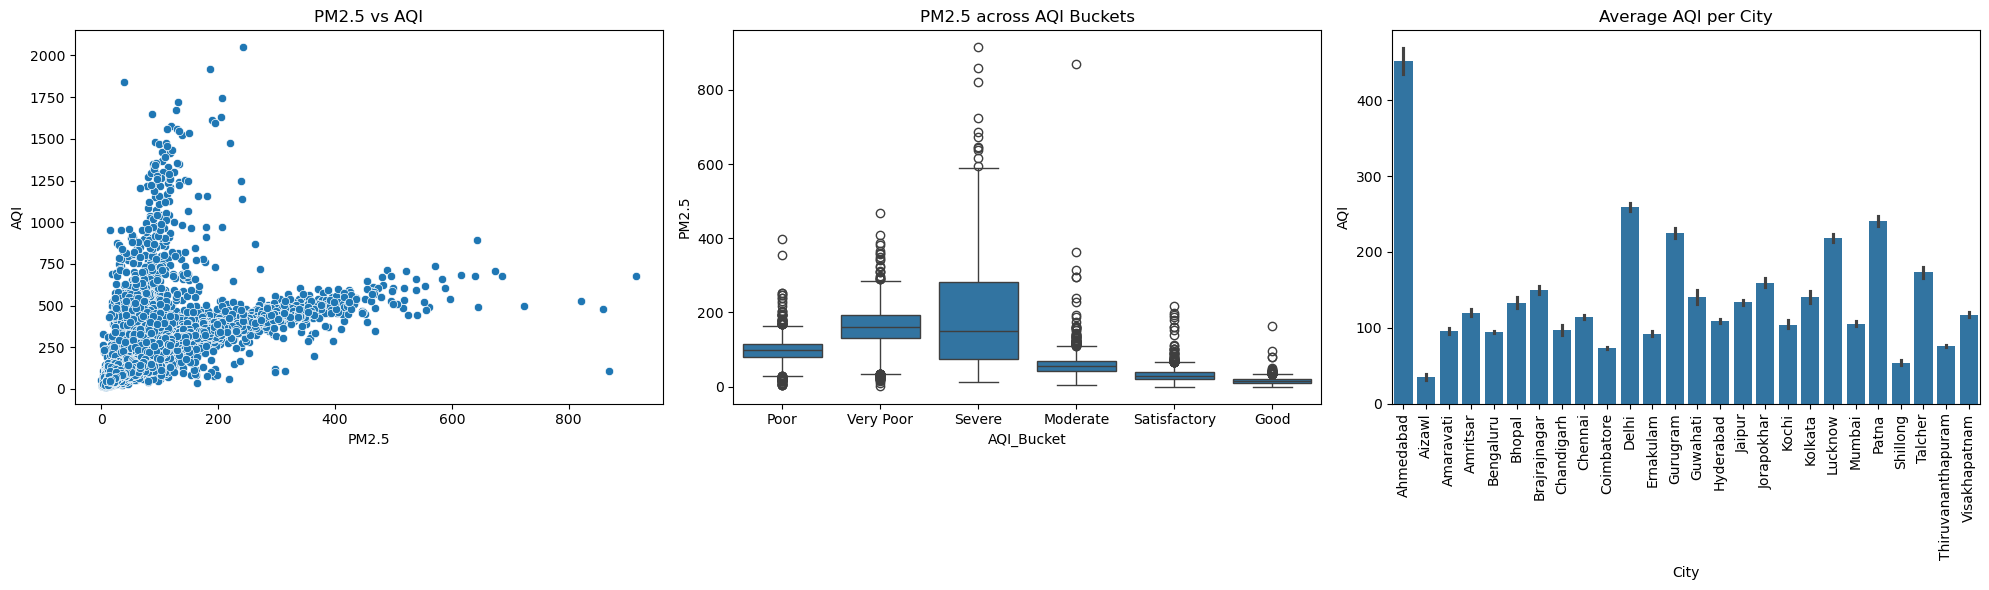

In [15]:
# Bivariate Analysis

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Scatterplot: PM2.5 vs AQI
sns.scatterplot(x='PM2.5', y='AQI', data=df, ax=axes[0])
axes[0].set_title('PM2.5 vs AQI')

# 2. Boxplot: PM2.5 vs AQI_Bucket
sns.boxplot(x='AQI_Bucket', y='PM2.5', data=df, ax=axes[1])
axes[1].set_title('PM2.5 across AQI Buckets')

# 3. Barplot: Average AQI per City
sns.barplot(x='City', y='AQI', data=df, ax=axes[2], estimator='mean')
axes[2].set_title('Average AQI per City')
axes[2].tick_params(axis='x', rotation=90)  # rotate labels if cities are long

plt.tight_layout()
plt.show()

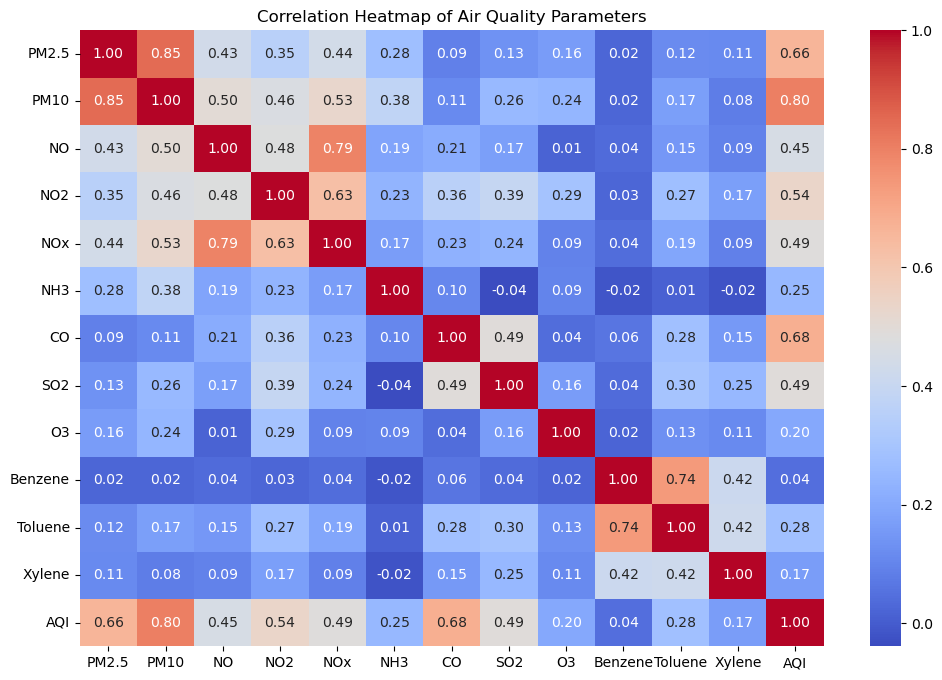

In [16]:
# Correlation Matix for Numerical Feature

# Selected only numeric columns
num_cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']

plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Air Quality Parameters")
plt.show()

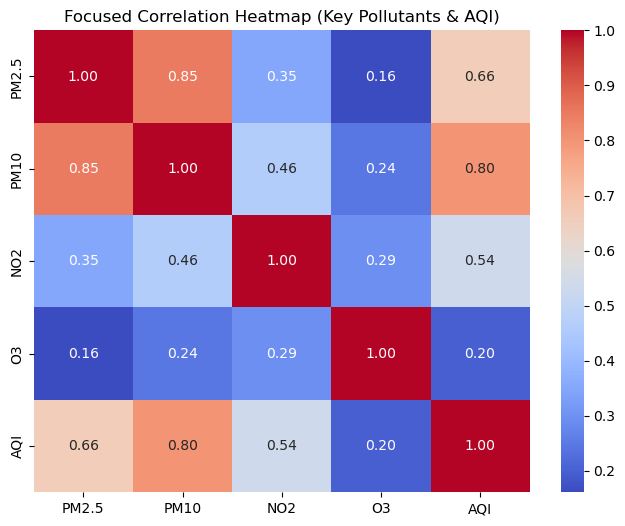

In [18]:
# Focused heatmap on top pollutants + AQI
focus_cols = ['PM2.5', 'PM10', 'NO2', 'O3', 'AQI']

plt.figure(figsize=(8, 6))
sns.heatmap(df[focus_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Focused Correlation Heatmap (Key Pollutants & AQI)")
plt.show()

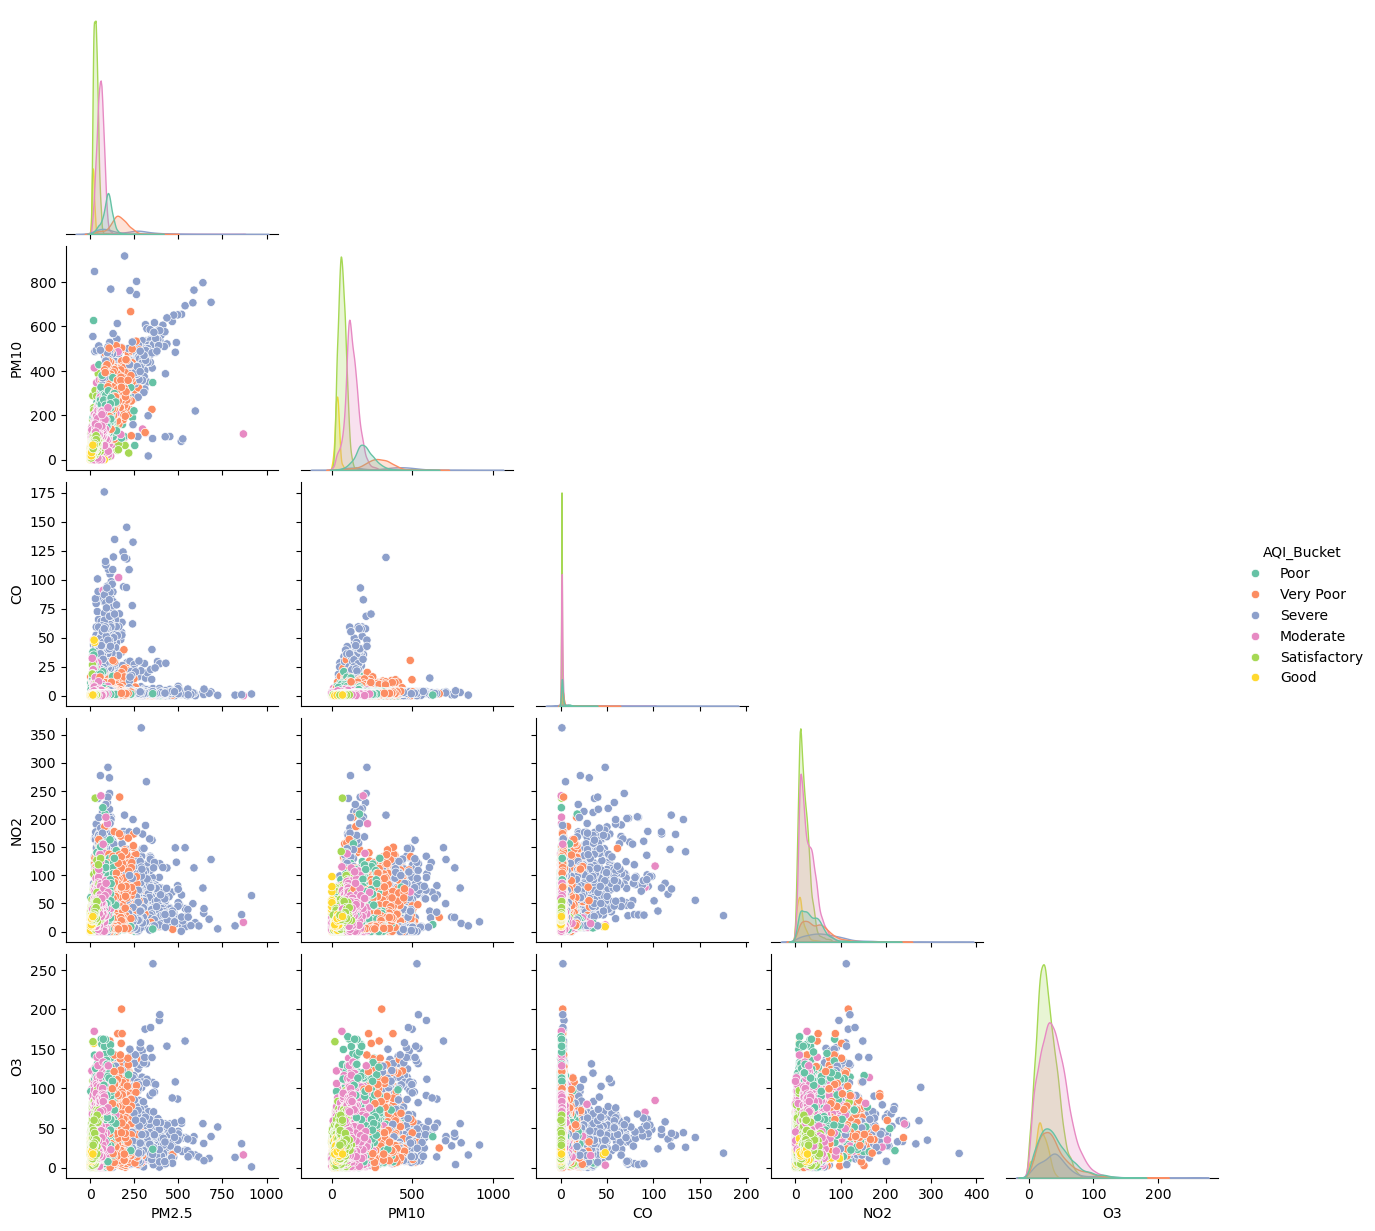

In [19]:
# Select only key numerical features
cols = ['PM2.5', 'PM10', 'CO', 'NO2', 'O3', 'AQI_Bucket']  # fewer features
sns.pairplot(df[cols], hue='AQI_Bucket', diag_kind='kde', corner=True, palette='Set2')

plt.show()

In [36]:
# Data Preprocessing

# Copying the dataframe to avoid overwriting original
df_processed = df.copy()

# For numerical columns, fill missing with mean
num_cols = ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'O3', 'AQI']  # adjust as per your dataset
df_processed[num_cols] = df_processed[num_cols].fillna(df_processed[num_cols].mean())

# For categorical columns, fill missing with mode
categorical_cols = ['City', 'AQI_Bucket']  # example categorical columns
for col in categorical_cols:
    df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0])

le = LabelEncoder()
for col in categorical_cols:
    df_processed[col] = le.fit_transform(df_processed[col])

In [37]:
# Feature and Target Selection
# Features (X) – drop the target column
X = df.drop('AQI_Bucket', axis=1)

# Target (y) – only the AQI_Bucket column
y = df['AQI_Bucket']

In [38]:
# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
# Check the shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (23624, 15)
X_test shape: (5907, 15)
y_train shape: (23624,)
y_test shape: (5907,)


In [42]:
# Scaling numerical features
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transform the test data using the same scaler
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [43]:
X_train

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
6688,Brajrajnagar,2018-03-13,1.150128,1.492470,17.11,0.214660,50.91,9.80,0.292643,0.146891,-0.771755,0.00,NaN,NaN,1.114345
29333,Visakhapatnam,2019-12-17,0.127230,0.048371,2.95,-0.063609,16.78,15.92,-0.161958,-0.347681,1.834286,4.93,7.53,1.13,-0.269901
27996,Thiruvananthapuram,2020-04-20,-0.802677,-0.994633,3.25,-0.843912,9.71,6.01,-0.251756,-0.482665,-0.213944,NaN,NaN,NaN,-0.846084
26848,Talcher,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21186,Lucknow,2018-09-02,-0.777357,NaN,7.44,-0.023856,23.79,28.83,-0.204051,-0.525263,-0.926652,0.09,0.21,NaN,-0.684472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,Lucknow,2019-09-26,-0.699251,NaN,7.97,-0.407451,16.24,2.02,-0.191423,-0.571733,-0.386819,1.05,3.61,NaN,-0.677445
5390,Bengaluru,2018-01-01,-0.448974,-0.475952,9.91,0.559321,22.62,NaN,-0.173183,-0.626501,-0.393273,NaN,NaN,NaN,-0.656365
860,Ahmedabad,2017-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15795,Hyderabad,2018-05-02,-0.479357,-0.240560,5.67,0.107697,18.75,15.34,-0.220888,-0.476027,0.666569,0.88,3.81,0.78,-0.459620
